# Module 6: CFA
# Use Case: Investment using Symbollic Artificial Intelligence
# =============================================================

After Dan Philps, Tim Law et al 2021. https://jfds.pm-research.com/content/early/2021/09/22/jfds.2021.1.077

https://github.com/danphilps/Investment-SAI


Get key packages, download data and get in good shape.

In [2]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# package for navigating the operating system
import os

If this is running in Google Colab.... we extract the GitHub loc where the data resides....

In [3]:
!git clone https://github.com/danphilps/Investment-SAI

Cloning into 'Investment-SAI'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 40 (delta 8), reused 19 (delta 4), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [4]:
# We should see a "Investment-SAI" directory....
os.listdir()

['.config', 'Investment-SAI', 'sample_data']

### a. Get the data we need
Step into the Investment-SAI/data directory and get the security level returns csv, load this into a DataFrame

In [5]:
# Change the working directory...
os.chdir('Investment-SAI/data')
# Extract security level returns
df_sec_rets = pd.read_csv('dat.csv')
# Extract 3m T-Bill rate
df_tb3ms = pd.read_csv('TB3MS.csv')

Extract factor returns from the Ken French data library

In [6]:
# Libraries...
import urllib.request
import zipfile
import csv

# Get factor returns from the Ken French data repository
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Emerging_5_Factors_CSV.zip"
# Download the file and save it
# We will name it fama_french.zip file
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
# Next we extact the file data
# We will call it ff_factors.csv
zip_file.extractall()
# Make sure you close the file after extraction
zip_file.close()

# Extract into a dataframe
df_ff_factors = pd.read_csv('Emerging_5_Factors.csv', skiprows = 3)

# Data wrangling... remove invalid rows (annual factors)
# There is white space in the date columns... strip this out
df_ff_factors.iloc[:,0] = df_ff_factors.iloc[:,0].str.strip()

# Find the start of the invalid rows and remove them all...
for row in range(1,df_ff_factors.shape[0]):
  if df_ff_factors.iloc[row,0].isnumeric() == False:
    break
df_ff_factors = df_ff_factors.drop(df_ff_factors.index[row:])

print(df_ff_factors.head)

<bound method NDFrame.head of     Unnamed: 0     Mkt-RF       SMB       HML        RMW         CMA    RF
0       198907    0.60     -0.39      15.53     -99.99    -99.99      0.70
1       198908   1.63       8.78      -3.73     -99.99    -99.99      0.74
2       198909  14.41       3.32      -7.70     -99.99    -99.99      0.65
3       198910   -2.18     -0.49      -4.36     -99.99    -99.99      0.68
4       198911   0.72      0.43        2.22     -99.99    -99.99      0.69
..         ...        ...       ...       ...        ...         ...   ...
393     202204  -5.26      0.55      3.49       0.37        1.70      0.00
394     202205    0.26     -1.54     -0.85     -0.14        1.66      0.03
395     202206  -6.77       0.13     -1.00     -1.51        0.37      0.06
396     202207   0.23      0.78      1.47       0.09        1.18      0.08
397     202208   0.76      0.32       0.87     -2.36        0.41      0.19

[398 rows x 7 columns]>


### b. Data Wrangling

We want the data with dates as columns, securities as rows (and factors as rows in the factor data). 
The latest date should be in the left most column... dates should all be the same format in each file.


In [7]:
# Get risk free rate sorted and transposed...
df_tb3ms = df_tb3ms.sort_values(by='DATE', ascending=False)
df_tb3ms = df_tb3ms.transpose()
# Set columns as dates
df_tb3ms.columns = df_tb3ms.iloc[0,:].astype(int)
df_tb3ms = df_tb3ms.iloc[1:, :]
# Force type to float
df_tb3ms = df_tb3ms.astype(dtype=float)
# stated at percentages? No...
df_tb3ms = df_tb3ms/100

#Check...
df_tb3ms.head()

DATE,202209,202208,202207,202206,202205,202204,202203,202202,202201,202112,...,193410,193409,193408,193407,193406,193405,193404,193403,193402,193401
TB3MS,0.0313,0.0263,0.0223,0.0149,0.0098,0.0076,0.0044,0.0033,0.0015,0.0006,...,0.0027,0.0021,0.0019,0.0015,0.0015,0.0016,0.0015,0.0024,0.0062,0.0072


In [8]:
# Get FF factors sorted and transposed...
# Columns as dates (latest date in the left col), rows are factors or securities...
df_ff_factors = df_ff_factors.sort_values(by=df_ff_factors.columns[0], ascending=False)
df_ff_factors = df_ff_factors.transpose()
# Set columns as dates
df_ff_factors.columns = df_ff_factors.iloc[0,:].astype(int)
df_ff_factors = df_ff_factors.iloc[1:, :]
# Force type to float
df_ff_factors = df_ff_factors.astype(dtype=float)
# stated at percentages? No...
df_ff_factors = df_ff_factors/100

#Check...
df_ff_factors.head()

Unnamed: 0,202208,202207,202206,202205,202204,202203,202202,202201,202112,202111,...,199004,199003,199002,199001,198912,198911,198910,198909,198908,198907
Mkt-RF,0.0076,0.0023,-0.0677,0.0026,-0.0526,-0.0157,-0.0293,-0.0209,0.0227,-0.0358,...,-0.0112,-0.0507,0.0376,0.0102,0.0693,0.0072,-0.0218,0.1441,0.0163,0.0060
SMB,0.0032,0.0078,0.0013,-0.0154,0.0055,0.0045,0.0021,-0.0279,0.0108,0.0091,...,0.0176,-0.0187,0.0535,0.0824,0.0269,0.0043,-0.0049,0.0332,0.0878,-0.0039
HML,0.0087,0.0147,-0.0100,-0.0085,0.0349,0.0290,0.0192,0.0583,0.0392,-0.0111,...,-0.0717,0.0288,0.0264,0.1296,0.1071,0.0222,-0.0436,-0.0770,-0.0373,0.1553
RMW,-0.0236,0.0009,-0.0151,-0.0014,0.0037,-0.0113,0.0158,0.0019,0.0242,0.0249,...,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999
CMA,0.0041,0.0118,0.0037,0.0166,0.0170,0.0116,0.0291,0.0111,0.0265,0.0057,...,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999,-0.9999


In [9]:
# Get security returns sorted and transposed...
# separate the security static data into another DataFrame
df_sec_static = df_sec_rets[['TICKER','NAME','SECTOR','COUNTRY']]
# Remove static data from the returns data frame
df_sec_rets = df_sec_rets.drop(['NAME','SECTOR','COUNTRY'], axis=1)
# Set row Index as TICKER...
df_sec_rets = df_sec_rets.set_index('TICKER')

# Set columns as int type (they are actually dates)
df_sec_rets.columns = df_sec_rets.columns.astype(int)
# Force type to float
df_sec_rets = df_sec_rets.astype(dtype=float)

#Check...
df_sec_rets.head()

,202210,202209,202208,202207,202206,202205,202204,202203,202202,202201,...,200311,200310,200309,200308,200307,200306,200305,200304,200303,200302
TICKER,,,,,,,,,,,,,,,,,,,,,
1,0.015466,-0.078267,0.022625,-0.046285,-0.174248,0.056826,-0.104553,0.188772,0.009208,0.248433,...,-0.032025,0.003149,0.143354,-0.037158,0.127003,-0.033725,0.018288,0.232334,0.033275,0.021873
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.163473,0.185020,0.147650,-0.018268,-0.048107,0.022944,0.347534,0.516898,0.382077,0.141174
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.023017,0.154562,0.065892,0.424243,0.297316,-0.041206,0.058162,0.754661,0.551300,-0.105352
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064808,0.341121,0.002585,0.273837,0.352588,0.037502,0.317328,0.103423,-0.079611,-0.147204
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.150969,0.393248,0.062933,0.147601,-0.038859,-0.000805,0.034123,0.125564,0.050399,-0.047134


Let's view our data... right orientation? no nan?

In [10]:
df_tb3ms.head()
df_ff_factors.head()
df_sec_rets.head()

,202210,202209,202208,202207,202206,202205,202204,202203,202202,202201,...,200311,200310,200309,200308,200307,200306,200305,200304,200303,200302
TICKER,,,,,,,,,,,,,,,,,,,,,
1,0.015466,-0.078267,0.022625,-0.046285,-0.174248,0.056826,-0.104553,0.188772,0.009208,0.248433,...,-0.032025,0.003149,0.143354,-0.037158,0.127003,-0.033725,0.018288,0.232334,0.033275,0.021873
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.163473,0.185020,0.147650,-0.018268,-0.048107,0.022944,0.347534,0.516898,0.382077,0.141174
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.023017,0.154562,0.065892,0.424243,0.297316,-0.041206,0.058162,0.754661,0.551300,-0.105352
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064808,0.341121,0.002585,0.273837,0.352588,0.037502,0.317328,0.103423,-0.079611,-0.147204
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.150969,0.393248,0.062933,0.147601,-0.038859,-0.000805,0.034123,0.125564,0.050399,-0.047134


Enforce the end and start dates and ensure date alignment across all data we are using... take the data with the earliest end date as the end date for all series... do the same for the start date too.

In [11]:
# Enforce the end date...
# Get the end_date that we will use, this will be the study end date...
end_date = min([max(df_tb3ms.columns), max(df_ff_factors.columns), max(df_sec_rets.columns)])

# Remove all date columns after the end_date
df_tb3ms = df_tb3ms.drop(columns=df_tb3ms.columns[df_tb3ms.columns > end_date])
df_ff_factors = df_ff_factors.drop(columns=df_ff_factors.columns[df_ff_factors.columns > end_date])
df_sec_rets = df_sec_rets.drop(columns=df_sec_rets.columns[df_sec_rets.columns > end_date])

# Enforce the start date...
# Get the start_date that we will use, this will be the study start date...
start_date = max([min(df_tb3ms.columns), min(df_ff_factors.columns), min(df_sec_rets.columns)])

# Remove all date columns after the end_date
df_tb3ms = df_tb3ms.drop(columns=df_tb3ms.columns[df_tb3ms.columns < start_date])
df_ff_factors = df_ff_factors.drop(columns=df_ff_factors.columns[df_ff_factors.columns < start_date])
df_sec_rets = df_sec_rets.drop(columns=df_sec_rets.columns[df_sec_rets.columns < start_date])

Sanity check you data for errors and (silly) mistakes. Eye ball the distributions and correlations too. Here are some of the checks you can do.

1. Date alignment errors
2. Check all percentages are formatted correctly
3. Check nan values have a low count

In [12]:
# Sanity checking
# 1: Dates are aligned?
if  (df_tb3ms.columns.equals(df_ff_factors.columns) == False) | (df_ff_factors.columns.equals(df_sec_rets.columns) == False):
  print('Sanity: Dates are not aligned...')

# 2: Percentages are percentages (not decimals)? 
# Check df_tb3ms median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_ff_factors.iloc[:,:].abs().median(skipna=True).median(skipna=True)
sd = df_ff_factors.iloc[:,:].std(skipna=True).median(skipna=True)
if (med_abs + sd*5 < df_tb3ms.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_tb3ms.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_ff_factors values to be outside of a sensible range...')  
if (med_abs + sd*5 < df_sec_rets.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_sec_rets.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_ff_factors values to be outside of a sensible range...')  

# Check df_ff_factors median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_tb3ms.iloc[0,:].abs().median(skipna=True) # only one row... only one median call needed
sd = df_tb3ms.iloc[0,:].std(skipna=True) # only one row... no median call needed
if (med_abs + sd*5 < df_ff_factors.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_ff_factors.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_tb3ms values to be outside of a sensible range...')  
if (med_abs + sd*5 < df_sec_rets.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_sec_rets.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_tb3ms values to be outside of a sensible range...')  

# Check df_sec_rets median is within median +/- 2standard deviations of df_ff_factors
med_abs = df_sec_rets.iloc[:,:].abs().median(skipna=True).median(skipna=True) # median of each row, median across rows
sd = df_sec_rets.iloc[:,:].std(skipna=True).median(skipna=True) # std of each row, median across rows
if (med_abs + sd*5 < df_tb3ms.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_tb3ms.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_sec_rets values appear to be outside of a sensible range...')  
if (med_abs + sd*5 < df_ff_factors.iloc[0,:].abs().median(skipna=True)) | (med_abs - sd*5 > df_ff_factors.iloc[0,:].abs().median(skipna=True)):  
  print('Sanity: df_sec_rets values appear to be outside of a sensible range...')  

# 3: Many nan? 
if df_tb3ms[df_tb3ms==np.nan].count().sum() / (df_tb3ms.shape[0]*df_tb3ms.shape[1]) > 0.33:
  print('Sanity: df_tb3ms; > 33% of values are nan')  
if df_ff_factors[df_ff_factors==np.nan].count().sum() / (df_ff_factors.shape[0]*df_ff_factors.shape[1]) > 0.33:
  print('Sanity: df_ff_factors; > 33% of values are nan')  
if df_sec_rets[df_sec_rets==np.nan].count().sum() / (df_sec_rets.shape[0]*df_sec_rets.shape[1]) > 0.33:
  print('Sanity: df_sec_rets; > 33% of values are nan')  


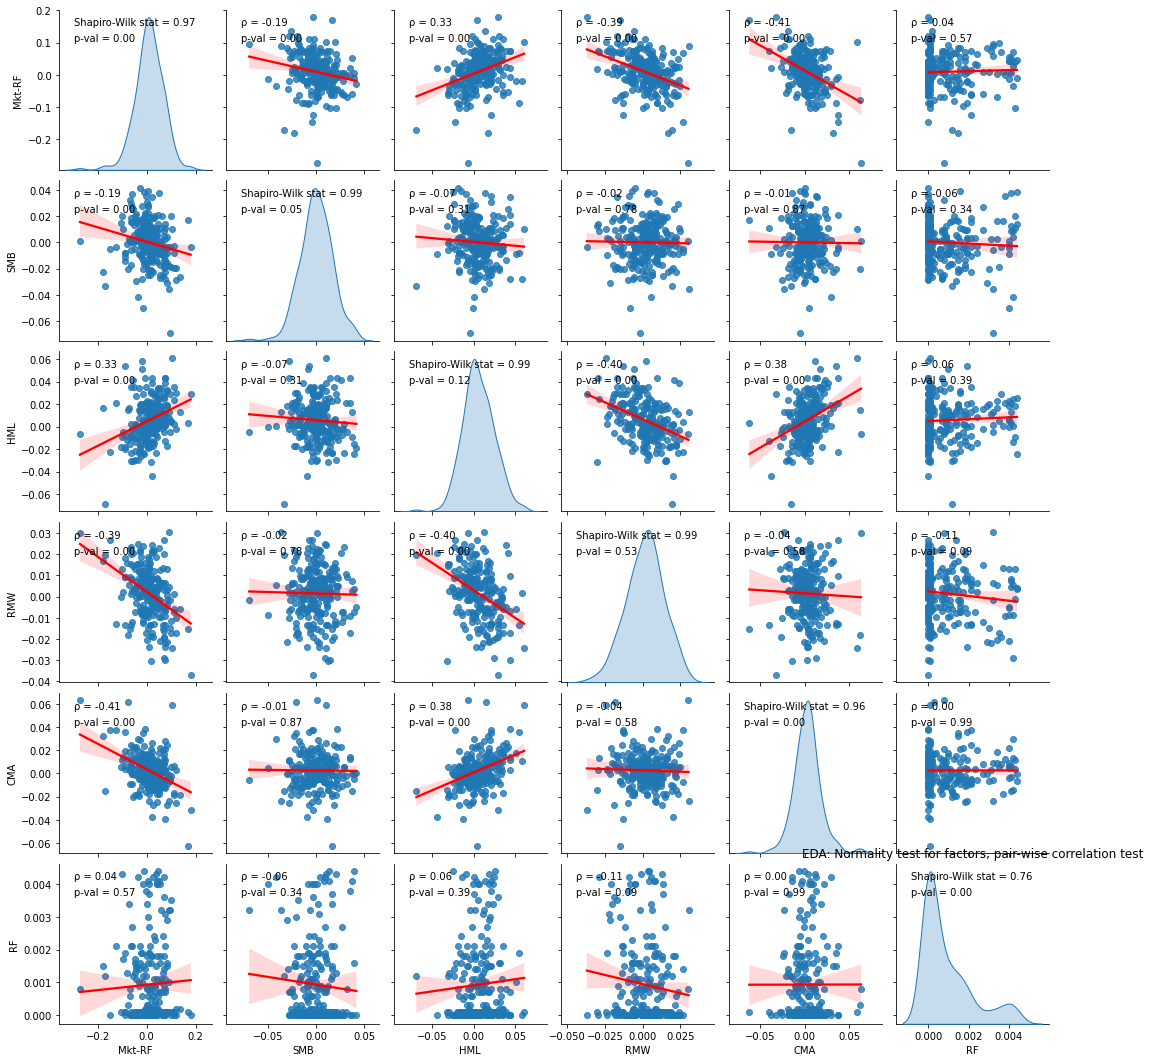

In [27]:
# 4: Eye ball the distributions...
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import shapiro

# Call function from chart generator...
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    _, _, r, p, _ = stats.linregress(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(f'p-val = {p:.2f}', xy=(.1, .8), xycoords=ax.transAxes)

# Call function from chart generator...
def normalityfunc(x, hue=None, ax=None, **kws):
    """Plot the Shapiro Wilk p-value in the top left hand corner of diagonal cells."""
    stat, p = shapiro(x)
    ax = ax or plt.gca()
    ax.annotate(f'Shapiro-Wilk stat = {stat:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate(f'p-val = {p:.2f}', xy=(.1, .8), xycoords=ax.transAxes)

# Generate pairplot
pp = sns.pairplot(df_ff_factors.transpose(), kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
pp.map_lower(corrfunc)
pp.map_upper(corrfunc)
pp.map_diag(normalityfunc)
plt.title("EDA: Normality test for factors, pair-wise correlation test")
plt.show()


# 1. Traditional Quantitative approach: Linear Factors

We first examine a traditional quanitative approach noting the biases involved in the construction of a traditional stock selection model, the basis of quantitative equity investment approaches for the vast majority of quant managers.


In [115]:
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error

In [133]:
sec = 0
y_train = [(1+df_sec_rets.iloc[sec, j]) / (1+df_tb3ms.iloc[0, j]) for j in range(0, 35)]
df_tb3ms.iloc[sec, :]
#X_train = df_ff_factors[:, 0:35]

#ols_model = OLS(y_train, X_train)
#res = ols_model.fit()

#loss_train = mean_squared_error(res.predict(X_train_reduced), y_train)
#loss_test = mean_squared_error(res.predict(X_test_reduced), y_test)
#loss_hist.loc[loss_hist.shape[0] + 1] = [i, loss]

DATE
202209    3.13
202208    2.63
202207    2.23
202206    1.49
202205    0.98
          ... 
193405    0.16
193404    0.15
193403    0.24
193402    0.62
193401    0.72
Name: TB3MS, Length: 1065, dtype: float64

In [128]:
df_tb3ms.iloc[0,10]

0.05

In [104]:
df_sec_rets[1, :]

TypeError: ignored

In [8]:
df_ff_factors

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1248,2018,-6.95,-3.21,-9.73,1.83
1249,2019,28.28,-6.10,-10.34,2.15
1250,2020,23.66,13.17,-46.57,0.45
1251,2021,23.56,-3.92,25.57,0.04


# 2. Machine Learning Enhanced Traditional Quantitative Approach

We now examine using "first generation" machine learning tools, applied in a traditional quantative framework.

## 2a. Factor Approach with Non-linear Regression


## 2b. Classification Approach

# 3. Interpretable Machine Learning Approach


# Stage1. Business Case 

Define key performance indicators (KPIs). 
Data needed, outcomes, model risk level, communication strategy.
Regulatory and Compliance issues 


In [ ]:
df_raw.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

There is clearly a bias in the dataset, but to expand upon this we can use a Chi2 test to examine whether the observed "bad" credits we see in female rows, is statistically significant to the expected difference we see in male rows.

It is possible that this bias is proxied by another data item in the dataset. **We will come back to this issue later**.

# Stage2: Exploratory Data Analysis

## Data Wrangling and Preprocessing

Data Wrangling: As we have shown in previous chapters we need to convert categorical data into one-hot-encodings, clean characters from numeric data columns, carry out type conversions into numeric datatypes... The following cell shows the appropriate data wrangling to get our data into a good shape. 

In [ ]:
# list categorical columns...
cat_cols =['checking_status', 'purpose', 'credit_history', 'savings_status', 'employment', 'other_parties', 'property_magnitude', 'other_payment_plans','housing','job','own_telephone']

# One hot encoding of catagorical variables...
df[cat_cols].astype("category")
one_hot_encodings = pd.get_dummies(df[cat_cols])

#Combine dfs
df = pd.concat([df, one_hot_encodings], axis=1)

#remove categorical columns...
df = df.drop(columns=cat_cols)

#Data wrangling..... get types and bad values sorted out

# Remove characters in numeric columns (note that the data type was set, by the open_csv function to object, 
# so we first convert to string before running the replace function (which can only be fun on str types)
df['foreign_worker'] = df['foreign_worker'].str.replace('yes', '1')
df['foreign_worker'] = df['foreign_worker'].str.replace('no', '0')
df['class'] = df['class'].str.replace('good', '0')
df['class'] = df['class'].str.replace('bad', '1')

# Convert to numerics so we can use in ML... we force type conversions, then print our resulting df.
df['foreign_worker'] = pd.to_numeric(df['foreign_worker'], errors ='coerce').fillna(0).astype('int')
df['class'] = pd.to_numeric(df['class'], errors ='coerce').fillna(0).astype('int')
df['duration'] = pd.to_numeric(df['duration'], errors ='coerce').fillna(0).astype('int')
df['installment_commitment'] = pd.to_numeric(df['installment_commitment'], errors ='coerce').fillna(0).astype('int')
df['residence_since'] = pd.to_numeric(df['residence_since'], errors ='coerce').fillna(0).astype('int')
df['age'] = pd.to_numeric(df['age'], errors ='coerce').fillna(0).astype('int')
df['num_dependents'] = pd.to_numeric(df['num_dependents'], errors ='coerce').fillna(0).astype('int')

df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,foreign_worker,class,checking_status_0<=X<200,...,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,48,5951,2,2,0,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
998,45,1845,4,4,0,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
df.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'foreign_worker', 'class', 'checking_status_0<=X<200',
       'checking_status_<0', 'checking_status_>=200',
       'checking_status_no checking', 'purpose_business',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'credit_history_all paid',
       'credit_history_critical/other existing credit',
       'credit_history_delayed previously', 'credit_history_existing paid',
       'credit_history_no credits/all paid', 'savings_status_100<=X<500',
       'savings_status_500<=X<1000', 'savings_status_<100',
       'savings_status_>=1000', 'savings_status_no known savings',
       'employment_1<=X<4', 'employment_4<=X<7', 'employment_<1',
       'employment_>=7', 'employment_une

# Stage3: Model Design 
Here we run the Classifier and monitor the KPIs

Imbalanced dataset....
0    203
1    203
Name: class, dtype: int64


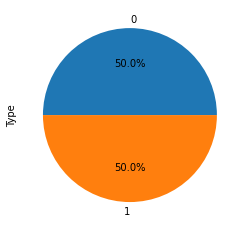

In [ ]:
#get pie of the current imbalance
temp = pd.concat([X_downsampled, y_downsampled], axis=1)
pie_of_imbalance(temp)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy train: 0.8719, test:  0.6667
Precision train: 0.8995, test:  0.8084
Recall train: 0.8374, test:  0.6650
F1 train: 0.8762, test:  0.5652


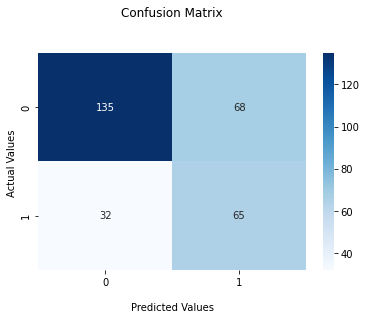

In [ ]:
#Run our function....
model = run_rf_classification_models(X_downsampled, X_test, y_downsampled, y_test)

As we can see, all up and down sampling approaches have outperformed the F1 Score on the imbalanced data. The most impressive performance in this case is from up-sampling using SMOTE synthetic data.

Dealing Imbalances 

Plot the accuracy of our model for all rows in the data set, plotting accuracy for our protected classes: by male and female credits.

Separate the data into train and test

In [ ]:
# Define X and y variables from scratch
cols  = list(df.columns)
cols.remove('class')

# Contains only numerics
X = df[cols]
y = df['class']

# Add binary variable where male=1, female=0
X['gender'] = np.where(df_raw['gender'] == 'female', 1, 0)

#Test and train set    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

Train our classifier using the SMOTE upsampling

In [ ]:
#How many samples do we need to balance?
idx = np.random.choice(X_train.shape[0], size=X_train[y_train == 0].shape[0]-X_train[y_train == 1].shape[0], replace=False)

# Generate SMOTE samples and use this to train
upsampler_smote = SMOTE()
X_upsampled_smote, y_upsampled_smote = upsampler_smote.fit_resample(X_train, y_train)

Train the classifier

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy train: 0.8648, test:  0.7167
Precision train: 0.8693, test:  0.8191
Recall train: 0.8586, test:  0.7689
F1 train: 0.8656, test:  0.5503


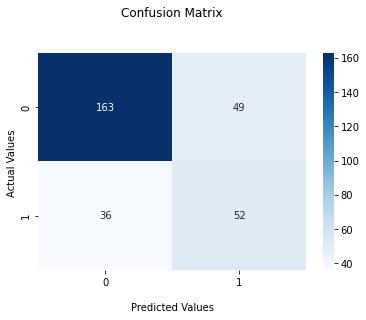

In [ ]:
#Remove the gender column
X_upsampled_smote_exgender = X_upsampled_smote.drop('gender', axis=1)
X_test_exgender = X_test.drop('gender', axis=1)

#Run our function....
model = run_rf_classification_models(X_upsampled_smote_exgender, X_test_exgender, y_upsampled_smote, y_test)

## Finally we check for Protected Characteristics and their Proxies...

We noted at the outset that there was a bias between the protected characterisctis of gender, with male and female credits being different, and we removed this protected characteristic from the dataset to avoid this illegal bias in loan approval outcomes.

Protected characteristics can be picked up (proxied) in other dataitems in more subtle ways though. For instance given that single parent households tend to disproportionately be led by a female adult, this may make 'num_dependents' a proxy for gender.

It is important that we control for any possible protected biases, and one way of achieving this is to retrain our model using a mitigator, which trains by constraining the model weights to produce a balanced outcome between protected classes; male and female credits in this case.

In [ ]:
from sklearn.metrics import accuracy_score

# Run classifier, in sample
y_pred = model.predict(X_test_exgender)

# Analyze metrics using MetricFrame
metric_frame = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=X_test['gender'])
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


NameError: ignored

The balance almost equal, this indicates that our model is tending to show now bias based non gender, which indicates that removing the protected dataitem in thefirst place has had a balancing effect on the outcomes. 

However, we can still explicuitly remove correlated features, and constrain model training to remove bias.

### Removing features correlated with protected characteristics

In [ ]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.metrics import MetricFrame

ModuleNotFoundError: ignored

In [ ]:
# List all the columns that are sensitive, supply in a list...
cr = CorrelationRemover(sensitive_feature_ids=['gender'])
cr.fit(X_upsampled_smote)
X_upsampled_smote_cr = cr.transform(X_upsampled_smote)

NameError: ignored

In [ ]:
# We set the balance in the population so we do not under or over-represent males or females...
constraint = DemographicParity(ratio_bound=0.5)

mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_upsampled_smote_cr, y_train, sensitive_features=['gender'])
y_pred_mitigated = mitigator.predict(X_test_exgender)

sr_mitigated = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=X_upsampled_smote['gender'])
print(sr_mitigated.overall)
print(sr_mitigated.by_group)

NameError: ignored

Let us inspect the results between the "fair" model outcomes and the potentially biased....

In [ ]:

#Print confusion matrix...
cf_matrix = confusion_matrix(y, y_pred_mitigated, labels=[0, 1]) 
cf_matrix_norm = cf_matrix.astype('float') # / cf_matrix.sum(axis=1)[:, np.newaxis]

ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Reds', fmt='g')
ax.set_title('Confusion Matrix Bias Mitigated\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

print(f"F1 full dataset: {f1_score(y, y_pred_mitigated, average=None)[1]:.4f}")
  
# Analyze metrics using MetricFrame
metric_frame = MetricFrame(metrics=accuracy_score, y_true=y, y_pred=y_pred_mitigated, sensitive_features=df_raw['gender'])
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

NameError: ignored

In [ ]:
#Print confusion matrix... for the unmitigated classifer...
cf_matrix = confusion_matrix(y, y_pred, labels=[0, 1]) 
cf_matrix_norm = cf_matrix.astype('float') # / cf_matrix.sum(axis=1)[:, np.newaxis]

ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix Non-Mitigated\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

print(f"F1 full dataset: {f1_score(y, y_pred, average=None)[1]:.4f}")


# Analyze metrics using MetricFrame
metric_frame = MetricFrame(metrics=accuracy_score, y_true=y, y_pred=y_pred, sensitive_features=df_raw['gender'])
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

## Availability heuristic/recency biases? Have we use the correct classifier...?

Using a familiar classifier has its advantages, but differet learners have different inductive biases, and strengths and weaknesses. 
We can create a cross valdation dataset, split from the training data to help us assess different classsifiers...

We need to make a new separation in the training dataset, for a cross-validation
set. This dataset will be used to test the choice of different classifiers after we have used the training data to train them, allowing us to test the classifiers out of sample using the test data.

In [ ]:
#Test and train set    
X_train_cv, X_cv, y_train_cv, y_cv = train_test_split(X_train, y_train, test_size=0.3, random_state=None)

Sklean provides many different classifeirs and we will be testing each accuracy on our problem.

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Now build a function that trains a number of different classifiers and the one with the best accuracy on the cross-validation data, we will select as the "best".

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names


LinearDiscriminantAnalysis()
F1 train: 0.8536, cross-valitaion:  0.4779

Winner
 <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy train: 0.7794, cross-validation:  0.4381
Precision train: 0.8302, cross-validation:  0.8261
Recall train: 0.9059, cross-validation:  0.2568
F1 train: 0.8536, cross-validation:  0.4779


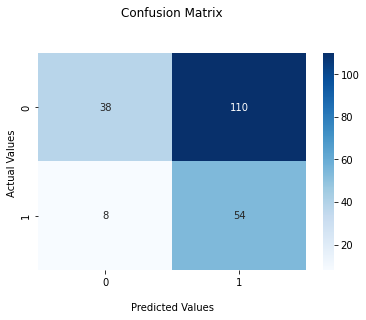

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

#Func to wrap up running these selected classification learners...
# NOTE: to test the performance of the learners out-of-sample, we should use a cross-validation dataset
# this is a hold back dataset and we will use our testing data to do this, in this case. 
def auto_classifier_selection(X_train: pd.DataFrame, X_cross_validation: pd.DataFrame, 
                            y_train: pd.DataFrame, y_cross_validation: pd.DataFrame) -> (list, list):
    
    #Balance training data....
    # Generate SMOTE samples and use this to train
    upsampler_smote = SMOTE()
    X_upsampled_smote, y_upsampled_smote = upsampler_smote.fit_resample(X_train, y_train)

    sclr = StandardScaler()
    sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

    X_train = sclr.fit_transform(X_upsampled_smote) # scale both sets:
    X_cross_validation = sclr.fit_transform(X_cross_validation)
    
    #Run only rf? Or all?
    dtc = DecisionTreeClassifier(max_depth=5) #If we allow endless depth we overfit
    gnb = GaussianNB()
    lr = LogisticRegression(max_iter=2000,random_state=0)
    mlp = MLPClassifier(max_iter=2000,random_state=1, early_stopping=True) # MLP will tend to overfit unless we stop early   
    rf = RandomForestClassifier(max_depth=3,random_state=0)
    lda = LinearDiscriminantAnalysis()
    
    all_mdls = [lda] #[dtc,gnb,lr,mlp,rf, lda]
    
    #Find the best
    max_f1 = 0
    for mdl in all_mdls:
        #Fit model
        mdl.fit(X_upsampled_smote,y_upsampled_smote)
        y_train_hat = mdl.predict(X_upsampled_smote)
        y_cross_validation_hat = mdl.predict(X_cross_validation)       
        mdl.predict_proba(X_cross_validation)

        # Output model selection information....
        print(mdl)
        print(f"F1 train: {f1_score(y_upsampled_smote, y_train_hat, average=None)[1]:.4f}, cross-valitaion: ",
        f"{f1_score(y_cross_validation,y_cross_validation_hat, average=None)[1]:.4f}")
        
        #F1...
        this_f1 = f1_score(y_upsampled_smote,y_train_hat, average=None)[1]
        if this_f1 > max_f1:
            max_f1 = this_f1
            max_mdl = mdl
        
    # The best....
    #Fit...
    max_mdl.fit(X_upsampled_smote,y_upsampled_smote)
    y_train_hat = max_mdl.predict(X_upsampled_smote)
    y_cross_validation_hat = max_mdl.predict(X_cross_validation)
    
    #    Print score
    print('\nWinner\n', type(max_mdl))        
    print(f"Accuracy train: {max_mdl.score(X_train,y_upsampled_smote):.4f}, cross-validation: ",
      f"{max_mdl.score(X_cross_validation,y_cross_validation):.4f}")
    print(f"Precision train: {precision_score(y_upsampled_smote, y_train_hat, average=None)[0]:.4f}, cross-validation: ",
      f"{precision_score(y_cross_validation,y_cross_validation_hat, average=None)[0]:.4f}")
    print(f"Recall train: {recall_score(y_upsampled_smote, y_train_hat, average=None)[0]:.4f}, cross-validation: ",
      f"{recall_score(y_cross_validation,y_cross_validation_hat, average=None)[0]:.4f}")
    print(f"F1 train: {f1_score(y_upsampled_smote, y_train_hat, average=None)[1]:.4f}, cross-validation: ",
      f"{f1_score(y_cross_validation,y_cross_validation_hat, average=None)[1]:.4f}")
        
    #Print confusion matrix...
    cf_matrix = confusion_matrix(y_cross_validation, y_cross_validation_hat, labels=[0, 1]) 
    cf_matrix_norm = cf_matrix.astype('float')

    ax = sns.heatmap(cf_matrix_norm, annot=True, cmap='Blues', fmt='g')
    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    
    return max_mdl, all_mdls

# Run our function....autoselect the best classifier wrt F1
max_mdl, all_models = auto_classifier_selection(X_train_cv, X_cv, y_train_cv, y_cv)

# Predict
y_test_hat = max_mdl.predict(X_test)

# Stage4: Model Deployment 

Model deployment generally involves a change process, several levels of testing and sign off, asignment of responsibilities for the live operation of the process, models and data before deployiong the code to the cloud (or on native hardware). 
A key part of thius stage is communication of the KPIs to stakleholders to enable them to understand the way the models operate, the risks involved and to be accountable for deploying the models


## Communication: Stakeholder Oriented Explanations

Communication of how the model has reached the outcomes it is has, is crutial to achieve fairness, transparency, accountability, and trust in the whole process. Each stakeholder in the process needs to see different elements. The Data Scientist and technical leadership need to review the nut and bolts of the model, reviewing residuals plots, parameter importance, interaction terms and many other metrics. The customer needs to see far less information, and mainly that associated with a refusal of credit. Compliance resources and regulators need to see something different again, such as fairness regarding protected characteristics, the accuracy and therefore capital risk represented by the models. 
In this section we look at stakeholder oriented explanations and we will be using standard charts of important analytics, such as residual plots, and SHAP.

First let us get the packages we will need...

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import shap

Now instantiate the SHAP explainer object for our classifier and generate Shapley values for the test data... Note that as we will be using the test data, all the analysis is therefore based on the out of sample performance of our model.

In [ ]:
print(type(max_mdl).__name__)

# Instantiate an explainer object for our chosen classifier...
if type(max_mdl).__name__ == 'DecisionTreeClassifier':
  explainer = shap.Explainer(max_mdl)
elif type(max_mdl).__name__ == 'GaussianNB':
  masker=shap.maskers.Impute(data=X_test) #,feature_names=X_test.columns)
elif type(max_mdl).__name__ == 'LogisticRegression':
  masker=shap.maskers.Impute(data=X_test) #,feature_names=X_test.columns)
elif type(max_mdl).__name__ == 'MLPClassifier':
  masker=shap.maskers.Impute(data=X_test) #,feature_names=X_test.columns)
elif type(max_mdl).__name__ == 'RandomForestClassifier':
  explainer = shap.Explainer(max_mdl)
elif type(max_mdl).__name__ == 'LinearDiscriminantAnalysis':
  masker = shap.maskers.Independent(data = X_test)
  explainer = shap.LinearExplainer(max_mdl, masker = masker)

# Get the Shapley values for the X_test data...
shap_values = explainer(X_test)

LinearDiscriminantAnalysis


## 1. Analyst and technical explainability

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


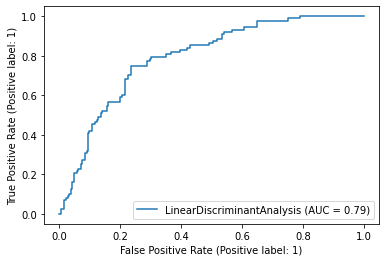

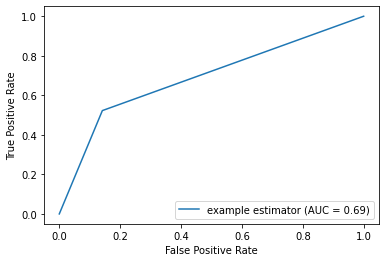

In [ ]:
import sklearn.metrics as metrics

# Compute micro-average ROC curve and ROC area
metrics.plot_roc_curve(max_mdl, X_test, y_test) 

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_hat)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

Feature importance

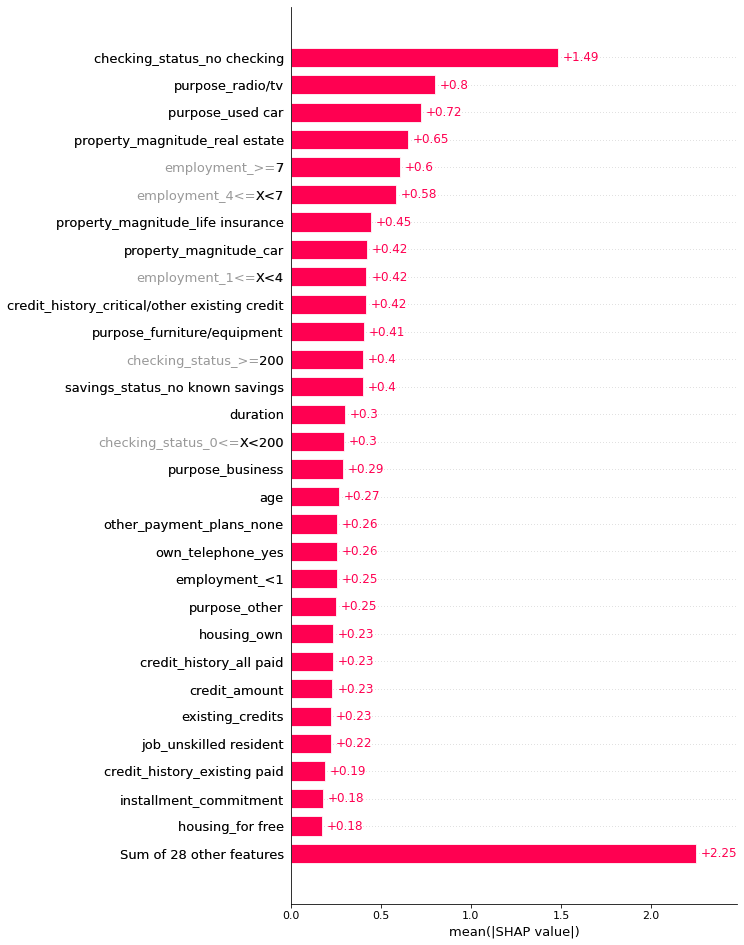

In [ ]:
# Plot the feature importance
shap.plots.bar(shap_values, max_display=30)

## 2. Compliance and Regulatory



See if any features are suspiciously important for one gender vs another.

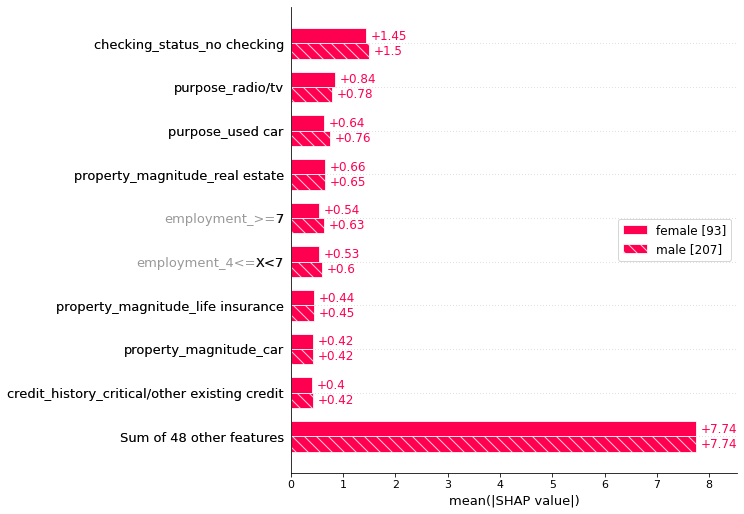

In [ ]:
# Parameter importance by gender..
gdr = ["male" if x==1 else "female" for x in X_test['gender']]

# Plot the feature importance
shap.plots.bar(shap_values.cohorts(gdr).abs.mean(0))

## 3. Customer

A customer may want to knowlt he sensitivity of the decision to certain characteristics. IF a refusal has been made, it would be beneficial to report to the customer what they need to change to get a favorable outcome. 

We can use the SHAP waterfall plot to help

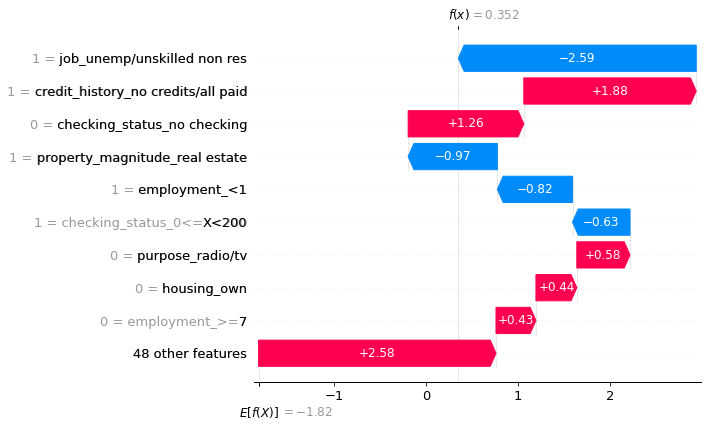

In [ ]:
# Find a customer with bad credit prediction
for rejected_eg_rowno in range(0,y_test.shape[0]):
  if y_test.iloc[rejected_eg_rowno] == 1:
    break

# This customer was refused credit and we can provide an explanation for their refusal...
shap.plots.waterfall(shap_values[rejected_eg_rowno])

In [ ]:
y_test.reset_index()

,index,class
0,255,0
1,485,1
2,182,1
3,128,0
4,916,0
...,...,...
295,892,0
296,4,1
297,729,0
298,903,0
